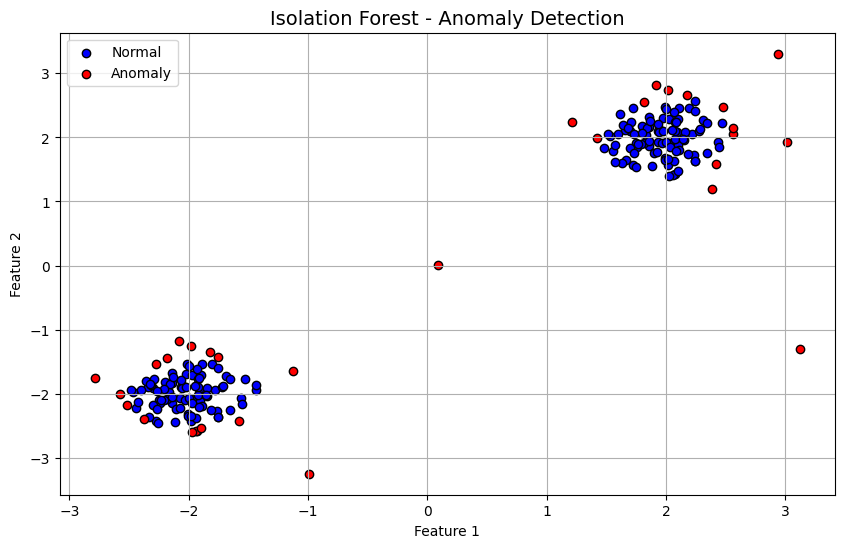

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. 샘플 데이터 생성 (정상 데이터 + 이상치)
rng = np.random.RandomState(42)

# 정상 데이터 100개 (클러스터 형태)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]

# 이상치 20개
X_outliers = rng.uniform(low=-4, high=4, size=(10, 2))

# 전체 데이터
X = np.r_[X_normal, X_outliers]

# 2. Isolation Forest 모델 학습
clf = IsolationForest(contamination=0.15, random_state=42)
clf.fit(X)

# 3. 이상치 예측
y_pred = clf.predict(X)  # 정상: 1, 이상치: -1

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.title("Isolation Forest - Anomaly Detection", fontsize=14)

# 정상 데이터
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', edgecolor='k', label="Normal")
# 이상치
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', edgecolor='k', label="Anomaly")

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
